In [1]:
from capture_image import capture_image
import sys
import os
import warnings
import numpy as np

# add parent folder to sys.path
sys.path.insert(0, os.path.abspath(".."))

# ignore DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ignore RuntimeWarning messages
warnings.filterwarnings("ignore", category=RuntimeWarning)

from volume_estimation.src.models_1_no_vol.predict_full_pipeline import predict_no_vol
from segmentation_and_depth.src.models.predict_model import predict as predict_seg_depth
from volume_estimation.src.models_2_input_vol.predict_full_pipeline import (
    predict_with_vol,
)

Image saved
Path:  captured_images/20230705_112524/image.png
Predicted liquid volume: 65.01 mL


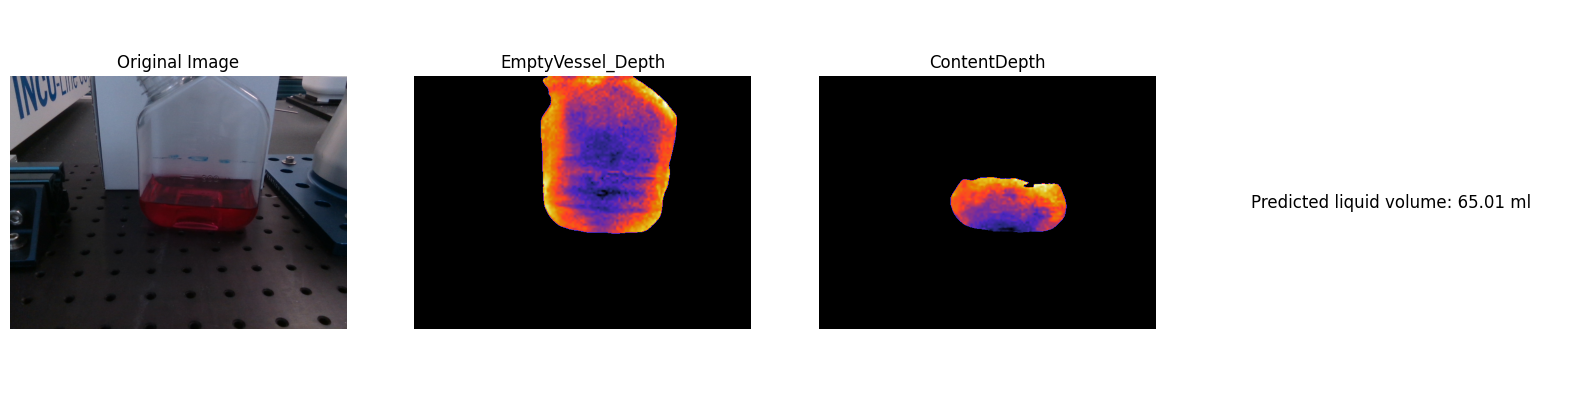

In [7]:
path = capture_image()
print("Path: ", path)
predict_no_vol(
    path, save_segmentation=True, save_depth=True, predict_volume=True, no_GPU=True
)

Image saved
Path:  captured_images/20230705_112748/image.png
Predicted liquid volume: 108 mL


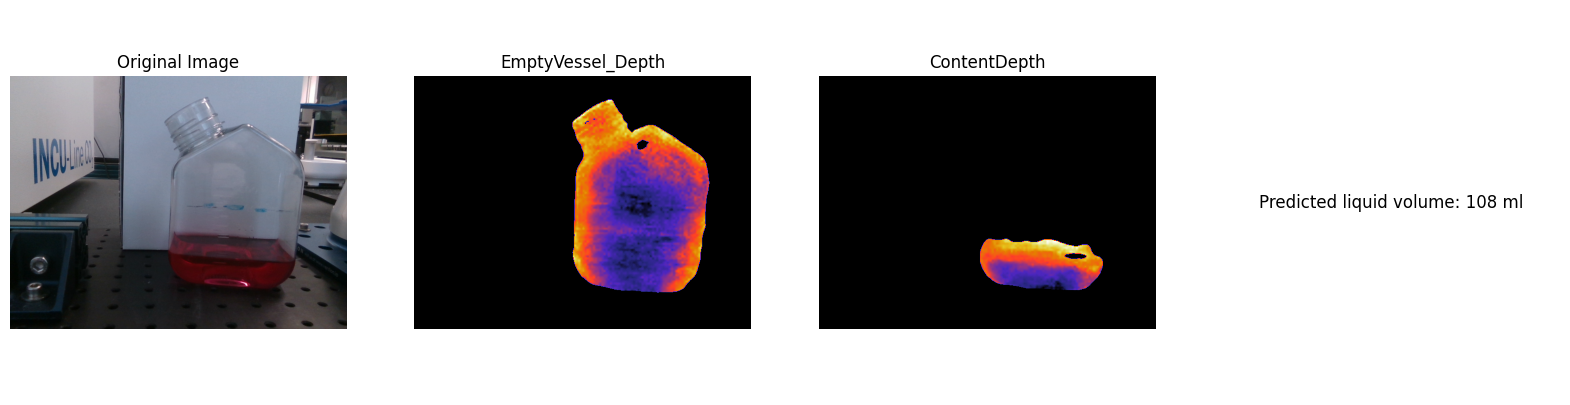

In [16]:
path = capture_image()
print("Path: ", path)
pred_vol = predict_with_vol(
    path,
    save_segmentation=False,
    save_depth=False,
    predict_volume=True,
    vessel_volume=755,
    no_GPU=True,
)

In [3]:
pred_vol

231

In [71]:
def check_vessel_open():
    vessel_open = False
    path = capture_image()
    print("Path: ", path)
    predict_no_vol(path, save_segmentation=True, save_depth=False, predict_volume=False)
    segmentation_map_npy = np.load(path[:-4] + "_VesselOpeningMask.npy")
    # value count of segmentation map
    unique, counts = np.unique(segmentation_map_npy, return_counts=True)
    print("Value count of segmentation map: ", dict(zip(unique, counts)))

    # if counts only contains 0, then vessel is closed:
    if len(counts) == 1:
        print("Vessel is closed.")
        return vessel_open
    # if count of 1 is greater than 500, then vessel is open:
    if counts[1] > 700:
        print("Vessel is open.")
        vessel_open = True
        return vessel_open
    else:
        print("Vessel is closed.")
        return vessel_open

In [72]:
vessel_opened = check_vessel_open()

Image saved
Path:  captured_images/20230703_122104/image.png
Value count of segmentation map:  {0: 307200}
Vessel is closed.


In [45]:
# load saved segmentation map as npy file
segmentation_map_npy = np.load(path[:-4] + "_VesselOpeningMask.npy")

print("Segmentation map shape: ", segmentation_map_npy.shape)

Segmentation map shape:  (1, 480, 640)


In [9]:
# value count of segmentation map
unique, counts = np.unique(segmentation_map_npy, return_counts=True)
print("Value count of segmentation map: ", dict(zip(unique, counts)))

Value count of segmentation map:  {0: 295338, 1: 11862}


In [62]:
model_path = "../segmentation_and_depth/models/segmentation_depth_model.torch"
predict_seg_depth(model_path, path)

FileNotFoundError: [Errno 2] No such file or directory: 'output/model.txt'